<a href="https://colab.research.google.com/github/faizijr12github/Zomato-EDA/blob/main/Zomato_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zomato Data Analysis Project

Step 1 : Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 : Create a dataFrame

In [3]:
dataframe = pd.read_csv('/content/Zomato data .csv')

In [4]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Convert the data type of column - rate

In [5]:
def handelRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handelRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


What type of resturant do the majority of customer order from?

Text(0.5, 0, 'type of resturant')

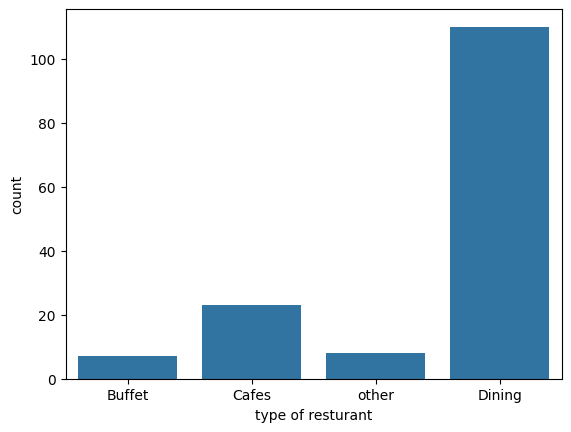

In [7]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel('type of resturant')

Conclusion : Majority of the customers falls in Dining Category

How many votes has each type of resturant recieved from customers?

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


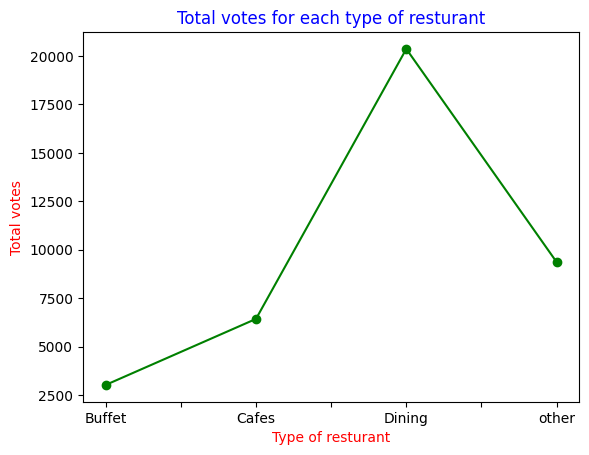

In [12]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().plot(c='green',marker='o')
plt.xlabel('Type of resturant',c='r')
plt.ylabel('Total votes',c='r')
plt.title('Total votes for each type of resturant',c='blue')
plt.show()

What are the ratings that the majority of resturants have recieved?

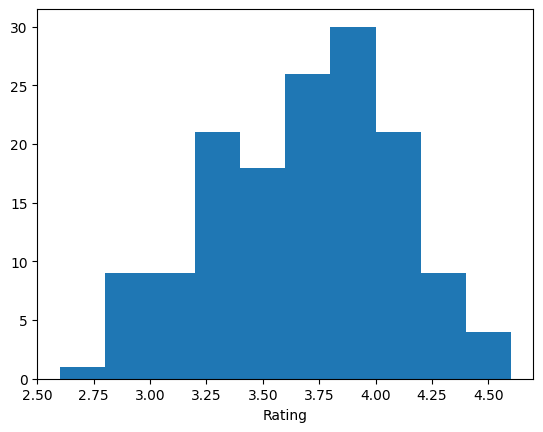

In [15]:
plt.hist(dataframe['rate'],bins=10)
plt.xlabel('Rating')
plt.show()

The majority resturants recieved raitings from 3.5 to 4

Zomato has obsereved that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

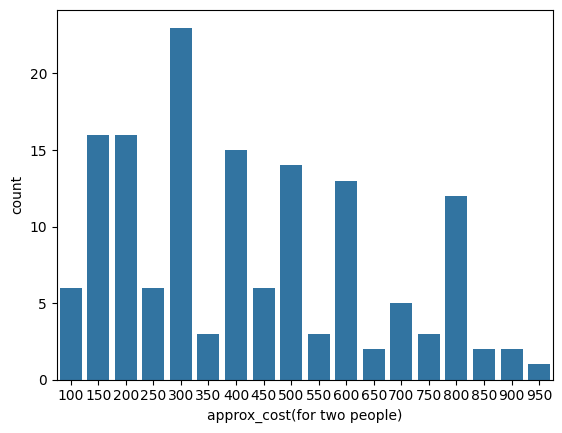

In [16]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

The couples orders most of the orders of 300

Which mode (online or offline) gets more ratings?

<Axes: xlabel='online_order', ylabel='rate'>

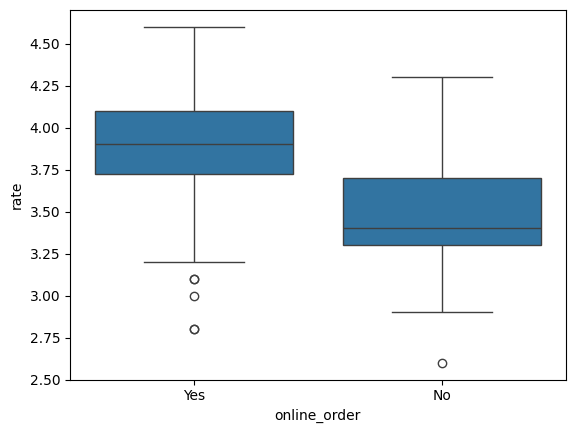

In [17]:
sns.boxplot(x=dataframe['online_order'],y=dataframe['rate'])

Online ordering gets more ratings than offline ordering

In [18]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


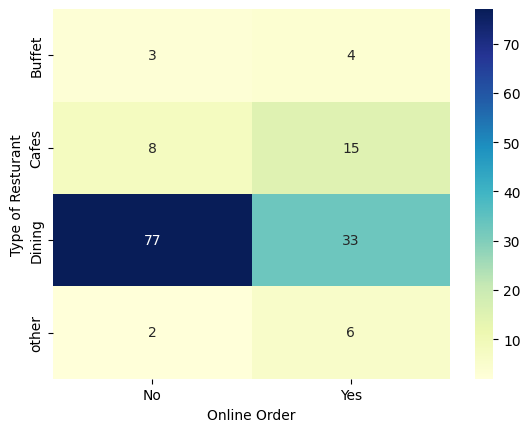

In [20]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Type of Resturant')
plt.show()